### Description
***
This notebook is for plotting the Norm1 and Norm2 differences between HYCOM output and EN4 analyses in the horizontal dimensions.

The two sets of plots are defined by the following two equations, defining the Norms. Firstly, Norm1:

$$\frac{\text{ERROR}_{FREE} - \text{ERROR}_{EnOI}}{\text{ERROR}_{FREE}} \times 100$$

where the "ERROR" is defined as the '*mean absolute error*' and is the absolute difference between the EnOI run and the reference data, in this case the EN4 analysis. So the $\text{ERROR}_{EnOI/FREE}$ can be defined as $|\text{EnOI} - \text{EN4}|$.

Secondly, Norm2:

$$\frac{\text{RMSE}_{FREE} - \text{RMSE}_{EnOI}}{\text{RMSE}_{FREE}} \times 100$$

where the RMSE is calculated using the EN4 analysis as the 'truth' dataset.

***

The EN4-transformed HYCOM data used in these scripts was generated on Fram by:
1. Linking weekly averages into a single directory; then
2. Using `hycave` to create a monthly mean from the weekly averages; then
3. Renaming the hycave output prefixes to be recognised by hyc2proj; then
4. Performing `hyc2proj` with depths matching the EN4 objective analysis; and
5. Finally performing `ncrcat` to create a single netcdf of all the data.

### From Francois's email:
***
***1)*** 
**Norm1** is equivalent to **mean absolute error**. 

In other word: $\text{mean} | (\text{obs}(:) - \text{mod}(:) |$


**Norm2** is equivalant to **RMSE**.

In other word: $\sqrt{(\text{mean}(\text{obs}(:) - \text{mod}(:))^{2})}$

**Bias** is $\text{mean}(\text{mod}) - \text{mean}(\text{obs})$

as bias can be negative you must take the abs before comparing two simulation 

e.g. plotting $|(\text{bias_free})| - |(\text{bias_assim})|$



***2)***
the *100 should be around parenthesis 

$(\frac{\text{error_free} - \text{error_assim}}{\text{error_free}}) * 100$

if error_free==error_assim ==> you get 0 (assim has not reduced error

if error_assim=0 ==> you get 100% you (have reduce all the error)

if error assim=2*error_free you get -100% (you have degraded the error)

Try to understand formula with simpler example like that
***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from scipy import stats

In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
# loading EN4 analysis data
# !!! This is for loading of sensitivity experiment time period !!!
# ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
# ds_EN4 = ds_EN4.sel(time=slice('2009-01','2009-09'))
# ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15
# ds_EN4 = ds_EN4.rename({'lat': 'latitude', 'lon': 'longitude'})

# loading EN4 analysis data
# !!! This is for loading of full experiment time period !!!
ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
ds_EN4 = ds_EN4.sel(time=slice('2009-01','2012-03'))
ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15
ds_EN4 = ds_EN4.rename({'lat': 'latitude', 'lon': 'longitude'})

#-------------------------------------------------------------------------------

# loading HYCOMcci data
# !!! This is for loading of sensitivity experiment time period !!!
# ds_hycomcci = xr.open_dataset('../Data/HYCOM_EN4_horizontal/CCI_SEN25_EN4H.nc')
# ds_hycomcci['time'].values = ds_EN4['time'].values
# ds_hycomcci['latitude'].values = ds_EN4['latitude'].values
# ds_hycomcci['longitude'].values = ds_EN4['longitude'].values
# ds_hycomcci['depth'].values = ds_EN4['depth'].values

# loading HYCOMcci data
# !!! This is for loading of full experiment time period !!!
ds_hycomcci = xr.open_dataset('../Data/HYCOM_EN4_horizontal/CCI_hyc2proj_EN4a.nc')
ds_hycomcci = ds_hycomcci.assign_coords(time = ds_EN4['time'].values)
ds_hycomcci = ds_hycomcci.assign_coords(latitude = ds_EN4['latitude'].values)
ds_hycomcci = ds_hycomcci.assign_coords(longitude = ds_EN4['longitude'].values)
ds_hycomcci = ds_hycomcci.assign_coords(depth = ds_EN4['depth'].values)

#-------------------------------------------------------------------------------

# loading HYCOMostia data
# !!! This is for loading of sensitivity experiment time period !!!
# ds_hycomostia = xr.open_dataset('../Data/HYCOM_EN4_horizontal/OSTIA_SEN30_EN4H.nc')
# ds_hycomostia['time'].values = ds_EN4['time'].values
# ds_hycomostia['latitude'].values = ds_EN4['latitude'].values
# ds_hycomostia['longitude'].values = ds_EN4['longitude'].values
# ds_hycomostia['depth'].values = ds_EN4['depth'].values

# loading HYCOMostia data
# !!! This is for loading of full experiment time period !!!
ds_hycomostia = xr.open_dataset('../Data/HYCOM_EN4_horizontal/OSTIA_hyc2proj_EN4a.nc')
ds_hycomostia = ds_hycomostia.assign_coords(time = ds_EN4['time'].values)
ds_hycomostia = ds_hycomostia.assign_coords(latitude = ds_EN4['latitude'].values)
ds_hycomostia = ds_hycomostia.assign_coords(longitude = ds_EN4['longitude'].values)
ds_hycomostia = ds_hycomostia.assign_coords(depth = ds_EN4['depth'].values)

#-------------------------------------------------------------------------------

# # loading AVHRR data
# ds_hycomTSSTL2 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL2_SEN50_EN4H.nc')
# ds_hycomTSSTL2['time'].values = ds_EN4['time'].values
# ds_hycomTSSTL2['latitude'].values = ds_EN4['latitude'].values
# ds_hycomTSSTL2['longitude'].values = ds_EN4['longitude'].values
# ds_hycomTSSTL2['depth'].values = ds_EN4['depth'].values

# #-------------------------------------------------------------------------------

# # loading ATSR data
# ds_hycomTSSTL3 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL3_SEN40_EN4H.nc')
# ds_hycomTSSTL3['time'].values = ds_EN4['time'].values
# ds_hycomTSSTL3['latitude'].values = ds_EN4['latitude'].values
# ds_hycomTSSTL3['longitude'].values = ds_EN4['longitude'].values
# ds_hycomTSSTL3['depth'].values = ds_EN4['depth'].values

#-------------------------------------------------------------------------------

# loading HYCOMFree data
# !!! This is for loading of sensitivity experiment time period !!!
# ds_hycomfree = xr.open_dataset('../Data/HYCOM_EN4_horizontal/FREE_EN4H.nc')
# ds_hycomfree['time'].values = ds_EN4['time'].values
# ds_hycomfree['latitude'].values = ds_EN4['latitude'].values
# ds_hycomfree['longitude'].values = ds_EN4['longitude'].values
# ds_hycomfree['depth'].values = ds_EN4['depth'].values

# loading HYCOMFree data
# !!! This is for loading of full experiment time period !!!
ds_hycomfree = xr.open_dataset('../Data/HYCOM_EN4_horizontal/FREE_hyc2proj_EN4a.nc')
ds_hycomfree = ds_hycomfree.assign_coords(time = ds_EN4['time'].values)
ds_hycomfree = ds_hycomfree.assign_coords(latitude = ds_EN4['latitude'].values)
ds_hycomfree = ds_hycomfree.assign_coords(longitude = ds_EN4['longitude'].values)
ds_hycomfree = ds_hycomfree.assign_coords(depth = ds_EN4['depth'].values)

## Creating the Norms

In [4]:
# Defining functions to calculate absolute error and RMSE
def abs_err(dataset,variable):
    absolute_error = (np.absolute(ds_EN4[variable] 
                                  - dataset[variable])).mean(dim = 'time',
                                                             skipna=True)
    return absolute_error

def rmse(dataset,variable):
    rmse_ = np.sqrt((np.square(ds_EN4[variable] 
                               - dataset[variable])).mean(dim = 'time',
                                                          skipna=True))
    return rmse_

In [45]:
# Norm 1 (Mean absolute error)
#==========================================================================================

# norm for CCI analysis
cci_sst_norm1 = ((abs_err(ds_hycomfree,'temperature') - abs_err(ds_hycomcci,'temperature')) / abs_err(ds_hycomfree,'temperature')) * 100
cci_sst_norm2 = ((rmse(ds_hycomfree,'temperature') - rmse(ds_hycomcci,'temperature')) / rmse(ds_hycomfree,'temperature')) * 100

cci_sal_norm1 = ((abs_err(ds_hycomfree,'salinity') - abs_err(ds_hycomcci,'salinity')) / abs_err(ds_hycomfree,'salinity')) * 100
cci_sal_norm2 = ((rmse(ds_hycomfree,'salinity') - rmse(ds_hycomcci,'salinity')) / rmse(ds_hycomfree,'salinity')) * 100

# norm for OSTIA analysis
ostia_sst_norm1 = ((abs_err(ds_hycomfree,'temperature') - abs_err(ds_hycomostia,'temperature')) / abs_err(ds_hycomfree,'temperature')) * 100
ostia_sst_norm2 = ((rmse(ds_hycomfree,'temperature') - rmse(ds_hycomostia,'temperature')) / rmse(ds_hycomfree,'temperature')) * 100

ostia_sal_norm1 = ((abs_err(ds_hycomfree,'salinity') - abs_err(ds_hycomostia,'salinity')) / abs_err(ds_hycomfree,'salinity')) * 100
ostia_sal_norm2 = ((rmse(ds_hycomfree,'salinity') - rmse(ds_hycomostia,'salinity')) / rmse(ds_hycomfree,'salinity')) * 100

# # norm for TSSTL2
# TSSTL2_sst_norm1 = ((abs_err(ds_hycomfree,'temperature') - abs_err(ds_hycomTSSTL2,'temperature')) / abs_err(ds_hycomfree,'temperature')) * 100
# TSSTL2_sst_norm2 = ((rmse(ds_hycomfree,'temperature') - rmse(ds_hycomTSSTL2,'temperature')) / rmse(ds_hycomfree,'temperature')) * 100

# TSSTL2_sal_norm1 = ((abs_err(ds_hycomfree,'salinity') - abs_err(ds_hycomTSSTL2,'salinity')) / abs_err(ds_hycomfree,'salinity')) * 100
# TSSTL2_sal_norm2 = ((rmse(ds_hycomfree,'salinity') - rmse(ds_hycomTSSTL2,'salinity')) / rmse(ds_hycomfree,'salinity')) * 100

# # norm for TSSTL3
# TSSTL3_sst_norm1 = ((abs_err(ds_hycomfree,'temperature') - abs_err(ds_hycomTSSTL3,'temperature')) / abs_err(ds_hycomfree,'temperature')) * 100
# TSSTL3_sst_norm2 = ((rmse(ds_hycomfree,'temperature') - rmse(ds_hycomTSSTL3,'temperature')) / rmse(ds_hycomfree,'temperature')) * 100

# TSSTL3_sal_norm1 = ((abs_err(ds_hycomfree,'salinity') - abs_err(ds_hycomTSSTL3,'salinity')) / abs_err(ds_hycomfree,'salinity')) * 100
# TSSTL3_sal_norm2 = ((rmse(ds_hycomfree,'salinity') - rmse(ds_hycomTSSTL3,'salinity')) / rmse(ds_hycomfree,'salinity')) * 100

# 1. NORM1 (Mean Absolute Error)

## 1.1 CCI Temperature

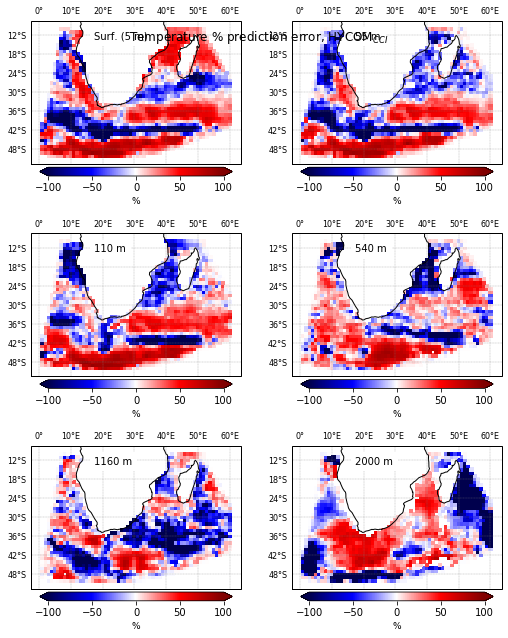

In [46]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm1_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.2 CCI Salinity

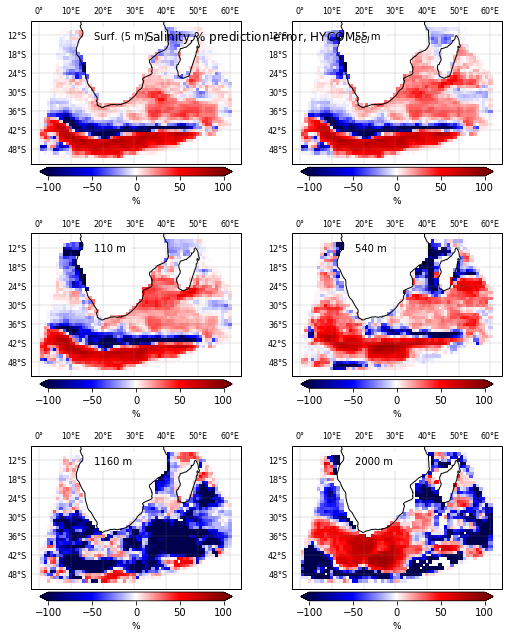

In [9]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm1_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.3 OSTIA Temperature

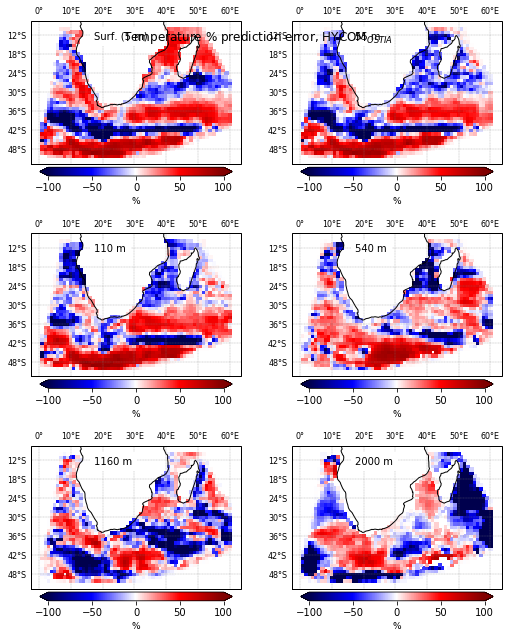

In [11]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm1_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.4 OSTIA Salinity

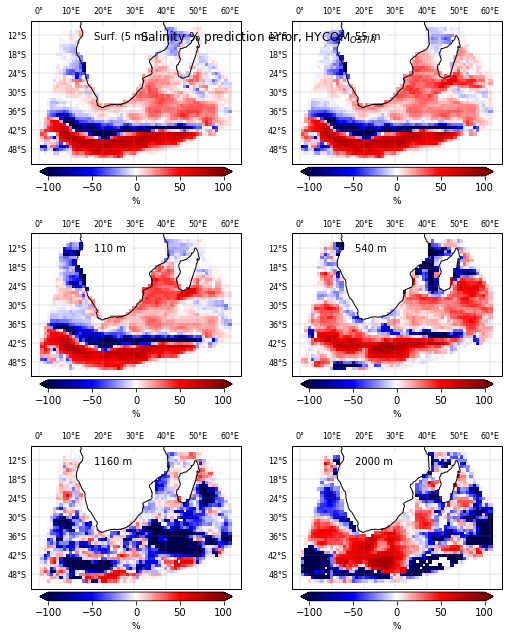

In [13]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm1_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.5 TSSTL2 Temperature

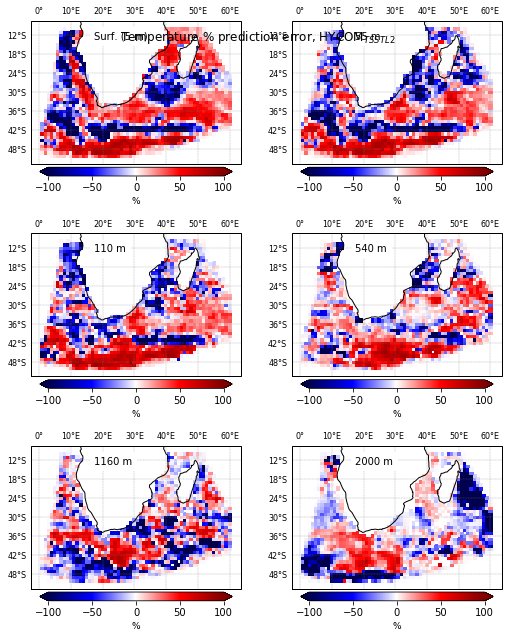

In [22]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm1_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.6 TSSTL2 Salinity

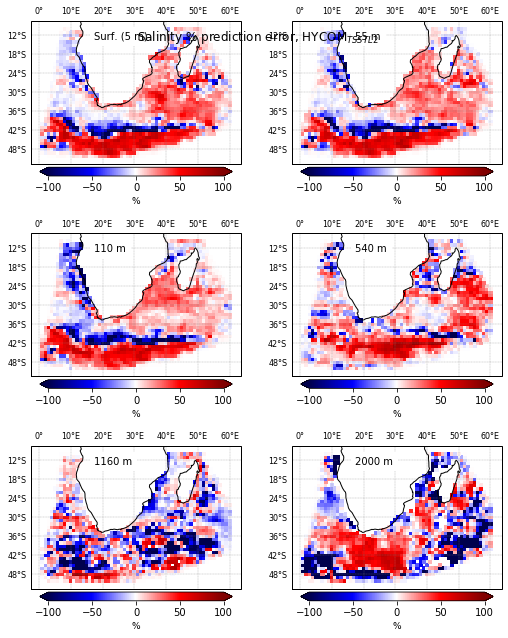

In [23]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm1_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.7 TSSTL3 Temperature

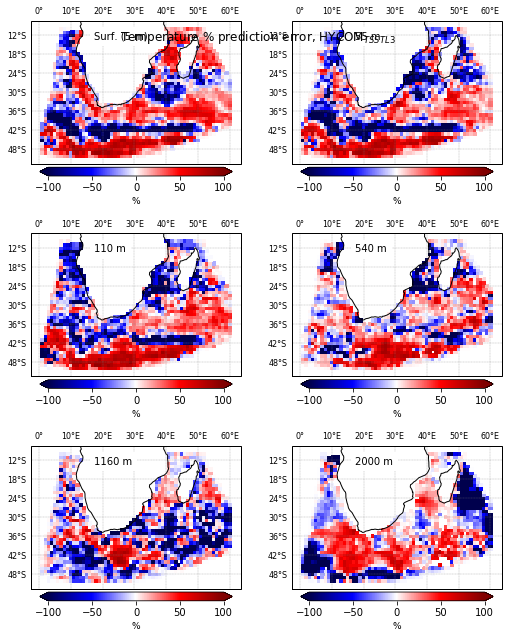

In [24]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm1_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.8 TSSTL3 Salinity

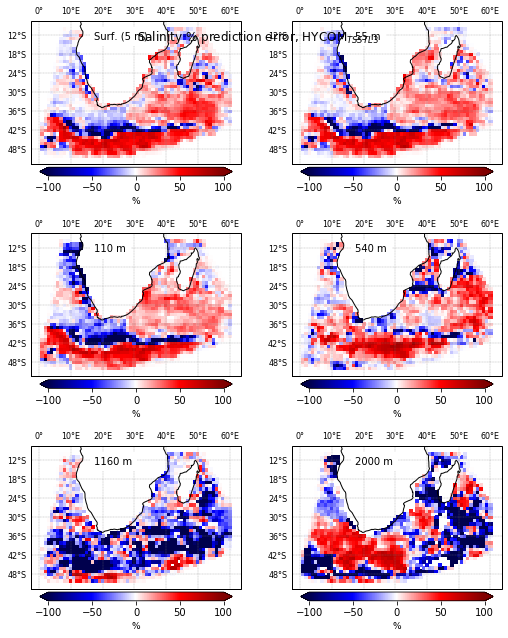

In [25]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm1_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 2. Norm2 (RMSE)

## 2.1 CCI Temperature

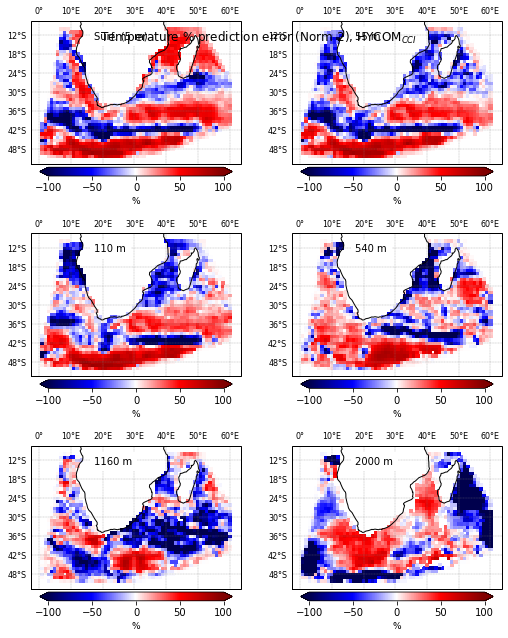

In [15]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm2_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.2 CCI Salinity

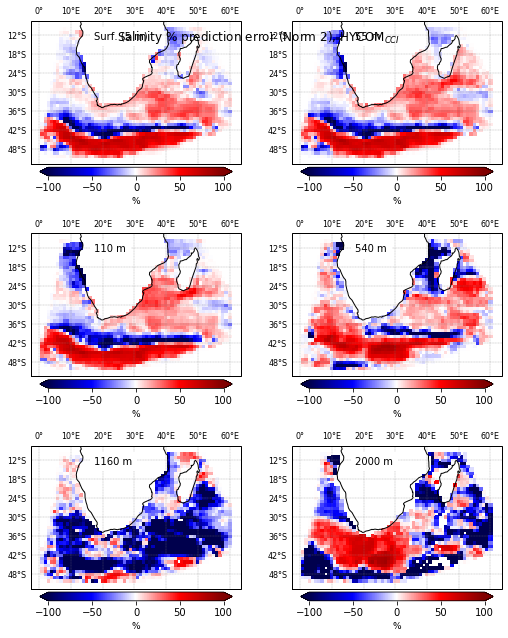

In [17]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm2_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.3 OSTIA Temperature

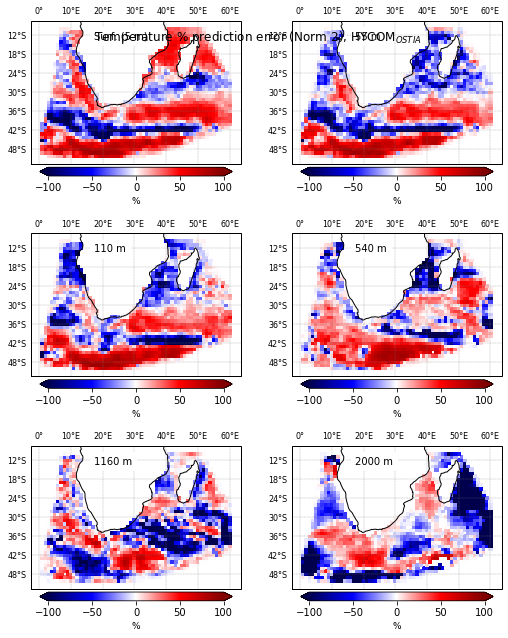

In [19]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm2_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.4 OSTIA Salinity

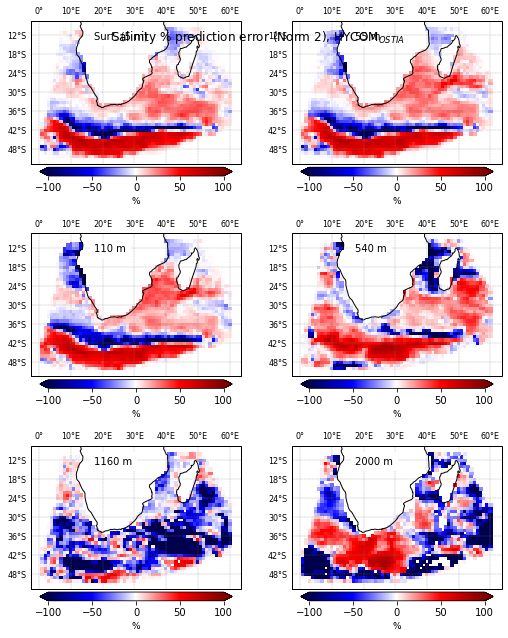

In [21]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm2_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.5 TSSTL2 Temperature

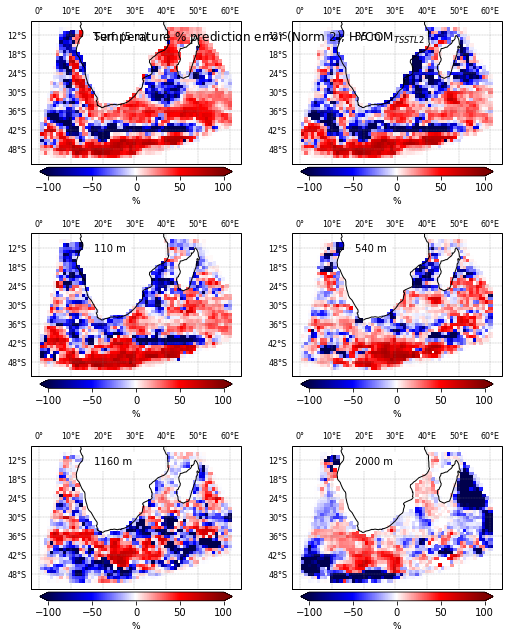

In [30]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm2_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.6 TSSTL2 Salinity

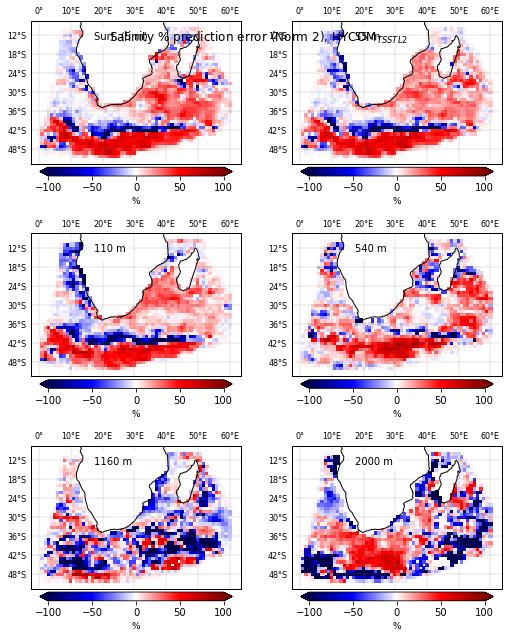

In [32]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm2_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.7 TSSTL3 Temperature

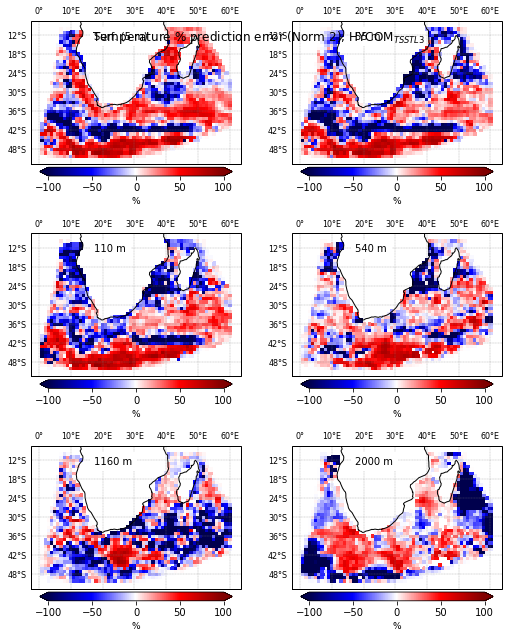

In [33]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm2_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.8 TSSTL3 Salinity

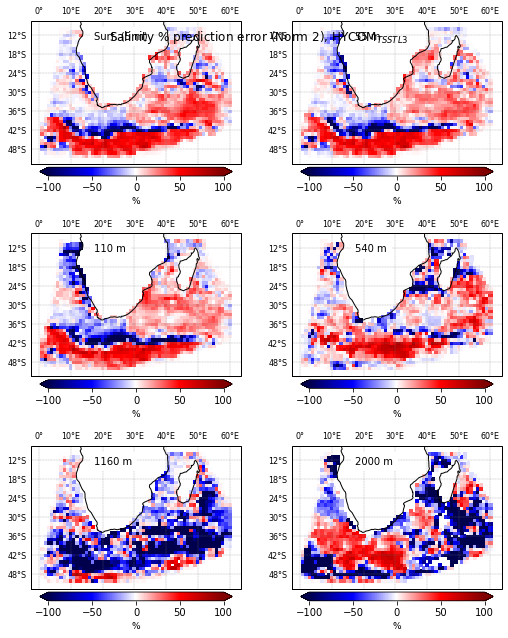

In [34]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm2_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 3. Horizontal RMSE

### Creating the RMSE variables

In [47]:
# Creating RMSE for CCI analysis
cci_temp_rmse = rmse(ds_hycomcci,'temperature')
cci_sal_rmse = rmse(ds_hycomcci,'salinity')

# Creating RMSE for OSTIA analysis
ostia_temp_rmse = rmse(ds_hycomostia,'temperature')
ostia_sal_rmse = rmse(ds_hycomostia,'salinity')

# # Creating RMSE for CCI TSSTL2 AVHRR
# TSSTL2_temp_rmse = rmse(ds_hycomTSSTL2,'temperature')
# TSSTL2_sal_rmse = rmse(ds_hycomTSSTL2,'salinity')

# # Creating RMSE for CCI TSSTL3 ATSR
# TSSTL3_temp_rmse = rmse(ds_hycomTSSTL3,'temperature')
# TSSTL3_sal_rmse = rmse(ds_hycomTSSTL3,'salinity')

# Creating RMSE for HYCOM FREE
free_temp_rmse = rmse(ds_hycomfree,'temperature')
free_sal_rmse = rmse(ds_hycomfree,'salinity')

## 3.1 CCI Temperature

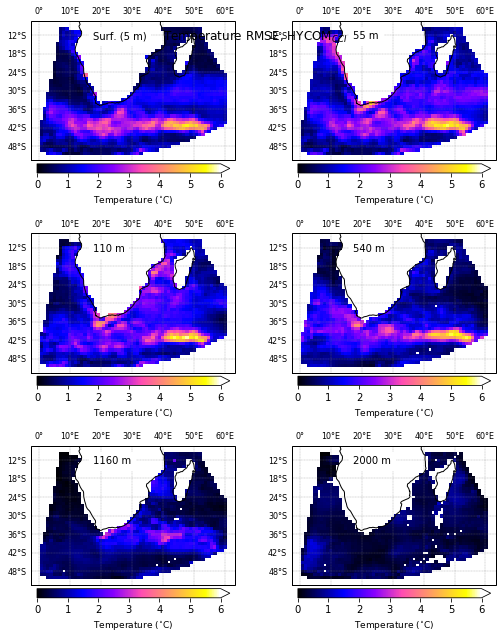

In [48]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_RMSE_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.2 CCI Salinity

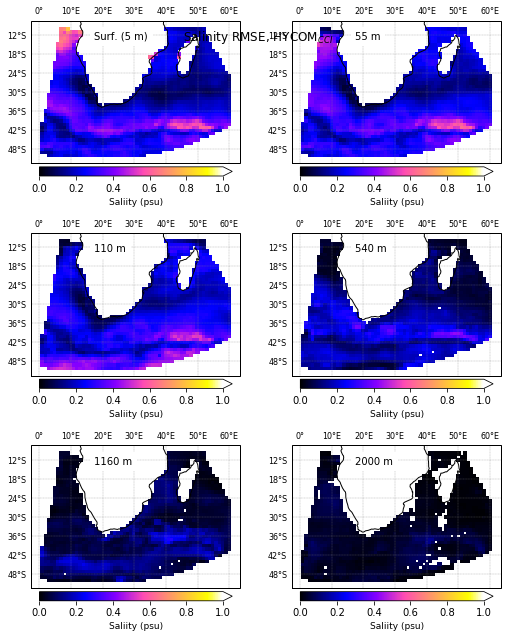

In [26]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_RMSE_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.3 OSTIA Temperature

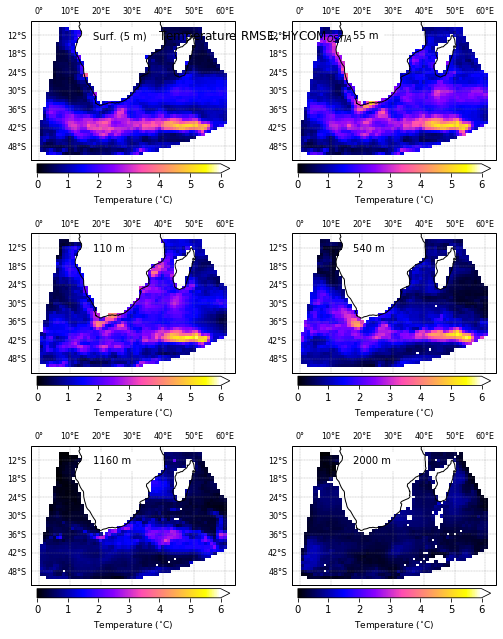

In [28]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_RMSE_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.4 OSTIA Salinity

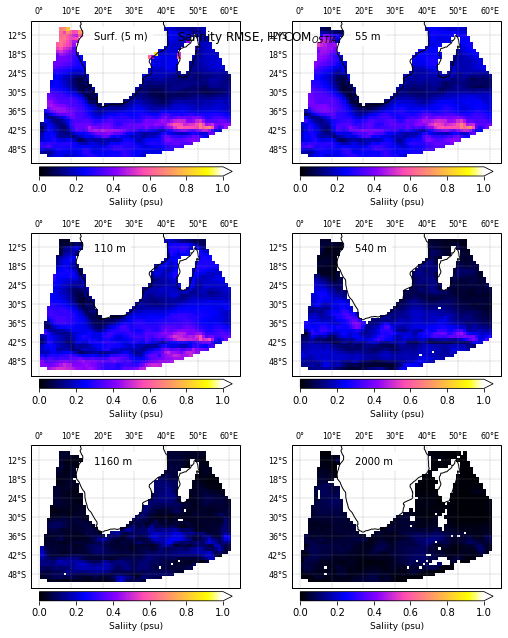

In [30]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_RMSE_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.5 TSSTL2 Temperature

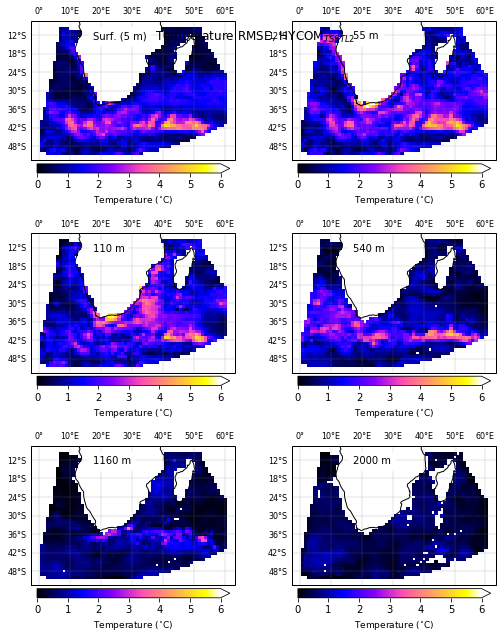

In [61]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RMSE_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.6 TSSTL2 Salinity

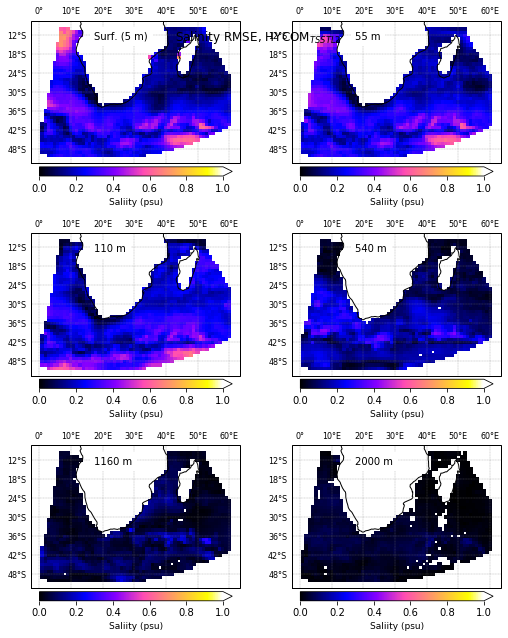

In [62]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RMSE_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.7 TSSTL3 Temperature

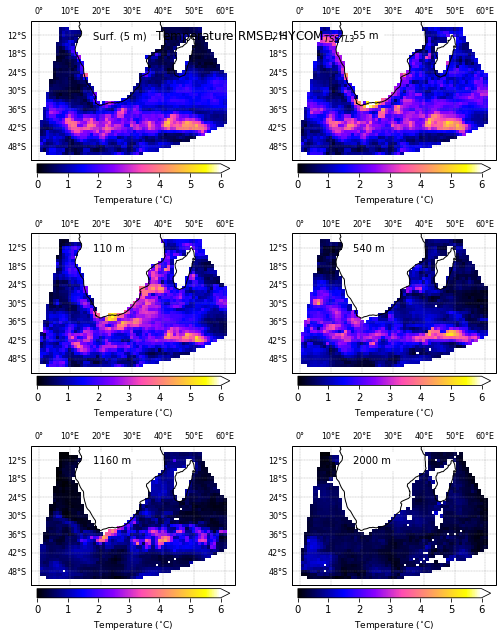

In [63]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RMSE_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.8 TSSTL3 Salinity

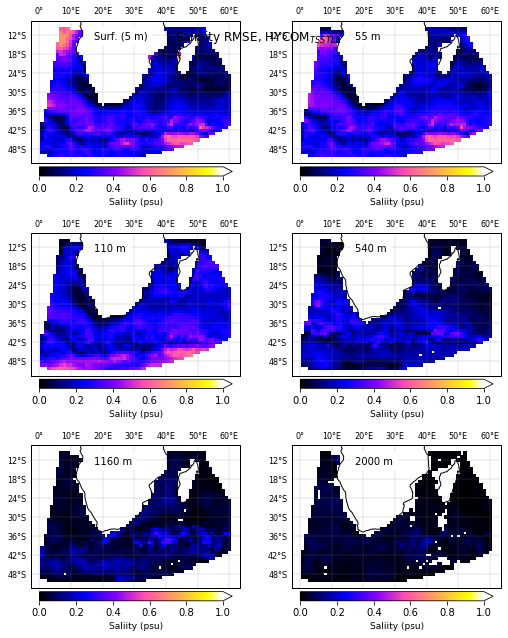

In [64]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RMSE_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.9 HYCOM<sub>FREE</sub> Temperature

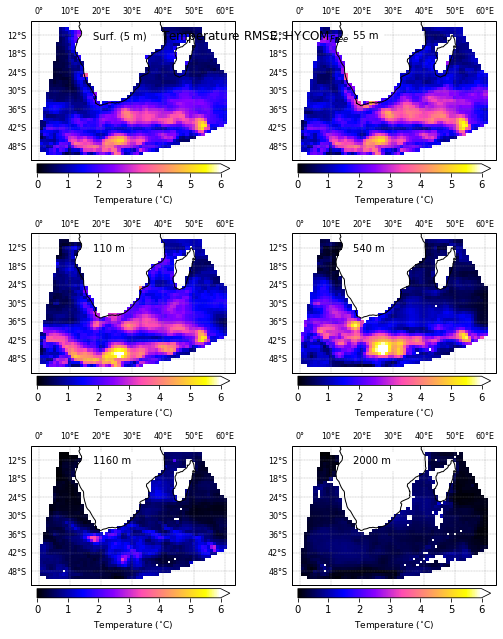

In [32]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{Free}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = free_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_RMSE_Free.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.10 HYCOM<sub>FREE</sub> Salinity

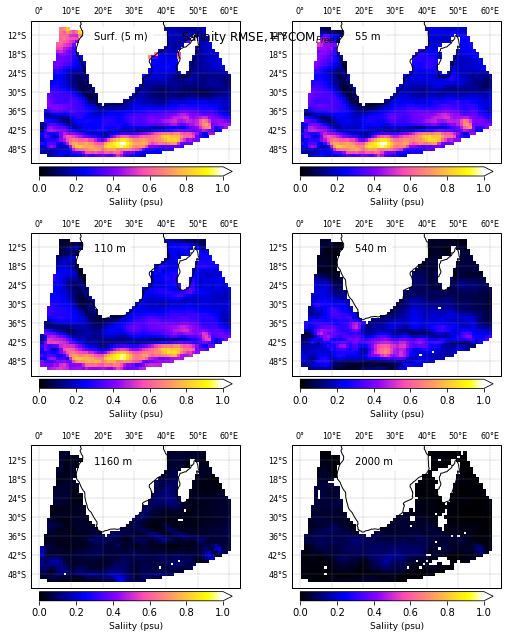

In [34]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{Free}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = free_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_RMSE_Free.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 4. "%RRMSE" Plots

## Creating each %RRMSE variable

In [5]:
# OSTIA - CCI
temp_rrmse_ostia_cci = np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomostia, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100) - np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomcci, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100)
temp_rrmse_ostia_cci.to_netcdf('../Data/OSTIA_CCI_temp_RRMSE.nc')
sal_rrmse_ostia_cci = np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomostia, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100) - np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomcci, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100)
sal_rrmse_ostia_cci.to_netcdf('../Data/OSTIA_CCI_sal_RRMSE.nc')

# # CCI - TSSTL3
# temp_rrmse_cci_TSSTL3 = np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomcci, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100) - np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomTSSTL3, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100)
# sal_rrmse_cci_TSSTL3 = np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomcci, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100) - np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomTSSTL3, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100)

# # CCI - TSSTL2
# temp_rrmse_cci_TSSTL2 = np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomcci, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100) - np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomTSSTL2, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100)
# sal_rrmse_cci_TSSTL2 = np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomcci, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100) - np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomTSSTL2, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100)

# # TSSTL3 - TSSTL2
# temp_rrmse_TSSTL3_TSSTL2 = np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomTSSTL3, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100) - np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomTSSTL2, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100)
# sal_rrmse_TSSTL3_TSSTL2 = np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomTSSTL3, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100) - np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomTSSTL2, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100)

## 4.1 HYCOM<sub>OSTIA</sub> - HYCOM<sub>CCI</sub>

### 4.1.1 Temperature

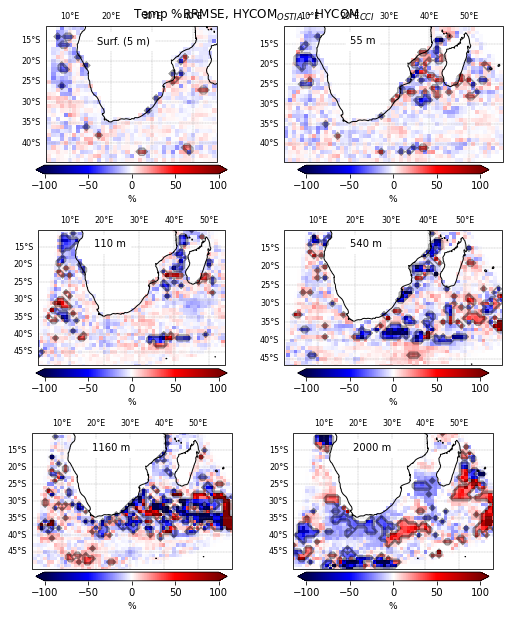

In [36]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temp %RRMSE, HYCOM$_{OSTIA}$ - HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    # Selecting depth layer to plot
    layer = temp_rrmse_ostia_cci[depths[s]]
    
    # Selecting data beyond 1 standard deviation
    plus_std = (temp_rrmse_ostia_cci[depths[s]].mean(skipna=True) +
                temp_rrmse_ostia_cci[depths[s]].std(skipna=True))
    minus_std = (temp_rrmse_ostia_cci[depths[s]].mean(skipna=True) -
                temp_rrmse_ostia_cci[depths[s]].std(skipna=True))
    signif_layer = temp_rrmse_ostia_cci[depths[s]].where((temp_rrmse_ostia_cci[depths[s]] <
                                                          lower_lim) | 
                                                         (temp_rrmse_ostia_cci[depths[s]] >
                                                          upper_lim))
    signif_layer = (signif_layer.notnull()).astype('int') # make 1-and-zeros mask
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                     add_colorbar=False, vmin=-100, vmax=100)
    ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
               colors='black', linewidths=0.2, alpha=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_RRMSE_HYCOMostiaHYCOMcci_new.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.1.2 Salinity

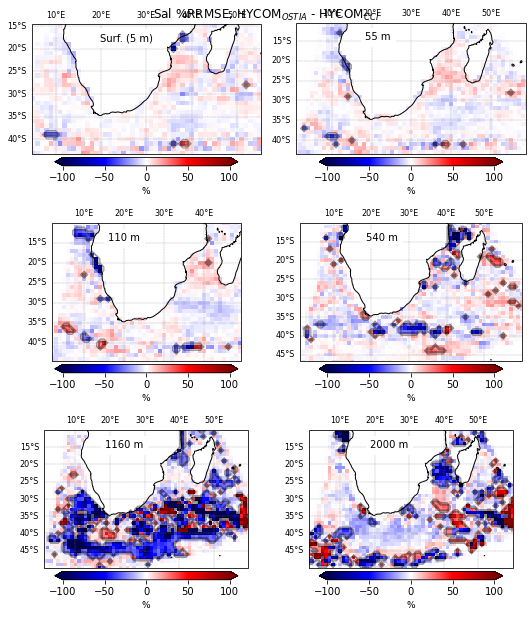

In [38]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{OSTIA}$ - HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    # Selecting depth layer to plot
    layer = sal_rrmse_ostia_cci[depths[s]]
    
    # Selecting data beyond 1 standard deviation
    plus_std = (sal_rrmse_ostia_cci[depths[s]].mean(skipna=True) +
                sal_rrmse_ostia_cci[depths[s]].std(skipna=True))
    minus_std = (sal_rrmse_ostia_cci[depths[s]].mean(skipna=True) -
                sal_rrmse_ostia_cci[depths[s]].std(skipna=True))
    signif_layer = sal_rrmse_ostia_cci[depths[s]].where((sal_rrmse_ostia_cci[depths[s]] <
                                                          lower_lim) | 
                                                         (sal_rrmse_ostia_cci[depths[s]] >
                                                          upper_lim))
    signif_layer = (signif_layer.notnull()).astype('int') # make 1-and-zeros mask
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                     add_colorbar=False, vmin=-100, vmax=100)
    ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
               colors='black', linewidths=0.2, alpha=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
# plt.savefig('../Figures/model_interior/Sal_RRMSE_HYCOMostiaHYCOMcci_new.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.2 HYCOM<sub>CCI</sub> - HYCOM<sub>TSSTL3</sub>

### 4.2.1 Temperature

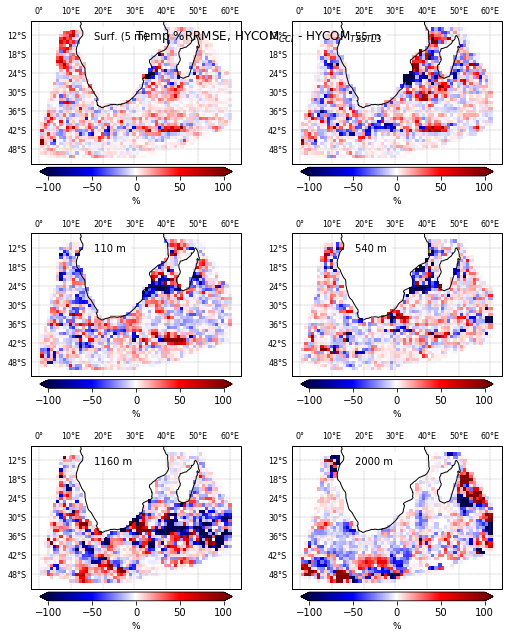

In [12]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temp %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = temp_rrmse_cci_TSSTL3[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RRMSE_HYCOMcciHYCOMTSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.2.2 Salinity

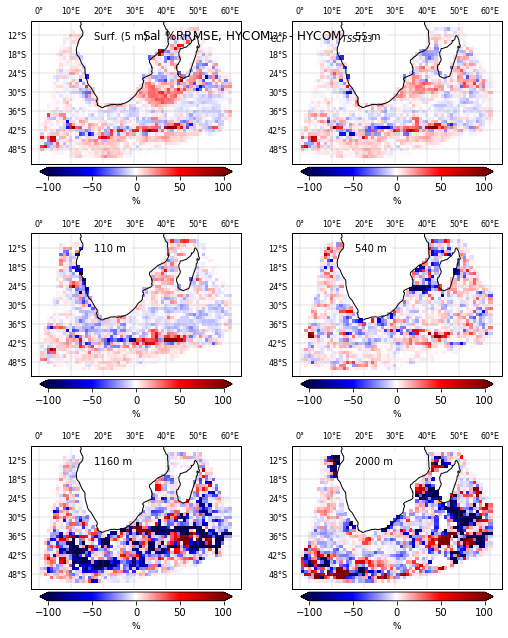

In [13]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = sal_rrmse_cci_TSSTL3[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RRMSE_HYCOMcciHYCOMTSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.3 HYCOM<sub>CCI</sub> - HYCOM<sub>TSSTL2</sub>

### 4.3.1 Temperature

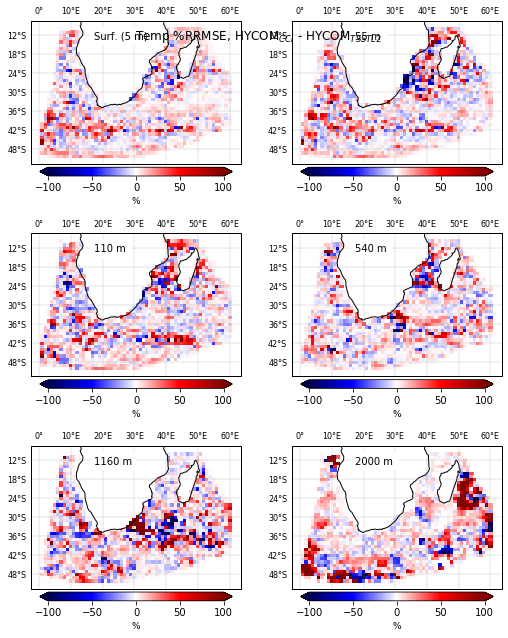

In [14]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temp %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = temp_rrmse_cci_TSSTL2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RRMSE_HYCOMcciHYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.3.2 Salinity

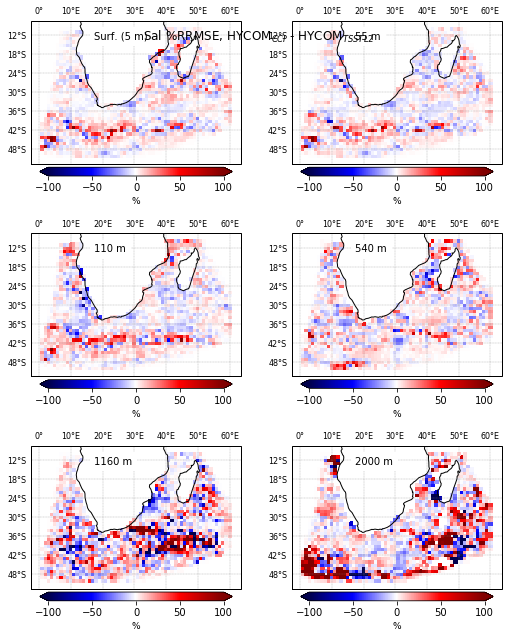

In [15]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = sal_rrmse_cci_TSSTL2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RRMSE_HYCOMcciHYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.4 HYCOM<sub>TSSTL3</sub> - HYCOM<sub>TSSTL2</sub>

### 4.4.1 Temperature

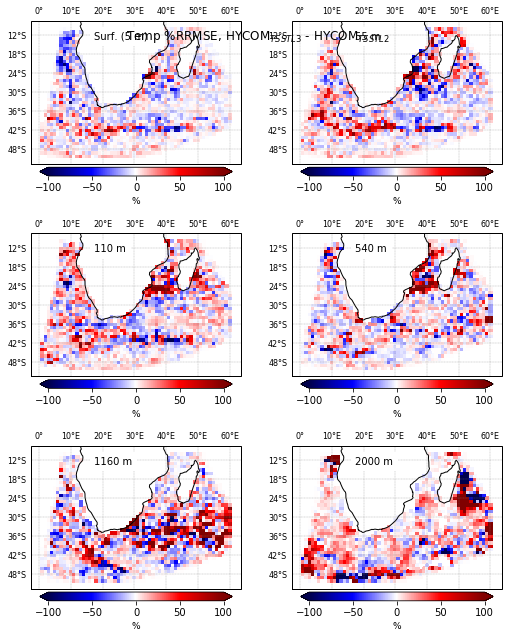

In [16]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temp %RRMSE, HYCOM$_{TSSTL3}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = temp_rrmse_TSSTL3_TSSTL2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RRMSE_HYCOMTSSTL3HYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.3.2 Salinity

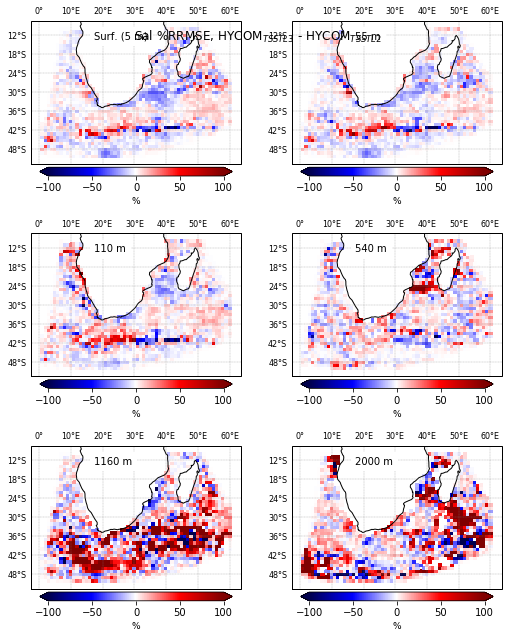

In [17]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{TSSTL3}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = sal_rrmse_TSSTL3_TSSTL2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RRMSE_HYCOMTSSTL3HYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()